In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
import matplotlib.animation as animation

In [35]:
#Define universal gravitation constant
G=6.67408e-11 #N-m2/kg2
#Reference quantities
m_nd=1.989e+30 #kg #mass of the sun
r_nd=5.326e+12 #m #distance between stars in Alpha Centauri
v_nd=30000 #m/s #relative velocity of earth around the sun
t_nd=79.91*365*24*3600*0.51 #s #orbital period of Alpha Centauri
#Net constants
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd

In [36]:
#Define masses
m1=1.1 #First Star
m2=0.907 #Second Star
m3=1.0 #Third Star

#Define initial position vectors
r1=[-0.5,0,0] #m
r2=[0.5,0,0]
r3=[0,1,0]

#Convert pos vectors to arrays
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")
r3=np.array(r3,dtype="float64")

#Find Centre of Mass
r_com=(m1*r1+m2*r2+m3*r3)/(m1+m2+m3)

#Define initial velocities
v1=[0.01,0.01,0] #m/s
v2=[-0.05,0,-0.1] 
v3=[0,-0.01,0]

#Convert velocity vectors to arrays
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")
v3=np.array(v3,dtype="float64")

#Find velocity of COM
v_com=(m1*v1+m2*v2+m3*v3)/(m1+m2+m3)

#Package initial parameters
init_params=np.array([r1,r2,r3,v1,v2,v3]) #Initial parameters
init_params=init_params.flatten() #Flatten to make 1D array
t=np.linspace(0,20,3000) #20 orbital periods and 500 points


In [37]:
def ThreeBodyEquations(t,w):
    r1=w[:3]
    r2=w[3:6]
    r3=w[6:9]
    v1=w[9:12]
    v2=w[12:15]
    v3=w[15:18]
    r12=sp.linalg.norm(r2-r1)
    r13=sp.linalg.norm(r3-r1)
    r23=sp.linalg.norm(r3-r2)
    
    dv1bydt=K1*m2*(r2-r1)/r12**3+K1*m3*(r3-r1)/r13**3
    dv2bydt=K1*m1*(r1-r2)/r12**3+K1*m3*(r3-r2)/r23**3
    dv3bydt=K1*m1*(r1-r3)/r13**3+K1*m2*(r2-r3)/r23**3
    dr1bydt=K2*v1
    dr2bydt=K2*v2
    dr3bydt=K2*v3
    
    r12_derivs=np.concatenate((dr1bydt,dr2bydt))
    r_derivs=np.concatenate((r12_derivs,dr3bydt))
    v12_derivs=np.concatenate((dv1bydt,dv2bydt))
    v_derivs=np.concatenate((v12_derivs,dv3bydt))
    derivs=np.concatenate((r_derivs,v_derivs))
    
    return derivs

In [38]:
three_body_sol = solve_ivp(ThreeBodyEquations, y0=init_params, t_span=(0,max(t)), t_eval=t, method='RK45', rtol=1e-12, atol=1e-12, vectorized=True)

In [39]:
r1_sol=np.array([three_body_sol.y[0],
                three_body_sol.y[1],
                three_body_sol.y[2]]).T

r2_sol=np.array([three_body_sol.y[3],
                three_body_sol.y[4],
                three_body_sol.y[5]]).T

r3_sol=np.array([three_body_sol.y[6],
                three_body_sol.y[7],
                three_body_sol.y[8]]).T

In [40]:
r1_sol

array([[-5.00000000e-01,  0.00000000e+00,  0.00000000e+00],
       [-4.99476333e-01,  5.05886782e-04, -4.73158335e-08],
       [-4.98870628e-01,  1.05802950e-03, -3.80251264e-07],
       ...,
       [-2.11867950e+00,  1.22548691e+00, -5.02709485e+00],
       [-2.12291971e+00,  1.22393814e+00, -5.01693980e+00],
       [-2.12661269e+00,  1.22338426e+00, -5.00711903e+00]])

/var/folders/mx/1c1hr6096hd7bz7xt9yf1b340000gn/T/ipykernel_21482/640879543.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(r1_sol[0, 0], r1_sol[0, 1], r1_sol[0, 2], color='red', s=20, label='Beggining Body 1', zorder=5, marker='x', edgecolor='black')
/var/folders/mx/1c1hr6096hd7bz7xt9yf1b340000gn/T/ipykernel_21482/640879543.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(r2_sol[0, 0], r2_sol[0, 1], r2_sol[0, 2], color='green', s=20, label='Beggining Body 2', zorder=5, marker='x', edgecolor='black')
/var/folders/mx/1c1hr6096hd7bz7xt9yf1b340000gn/T/ipykernel_21482/640879543.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x'

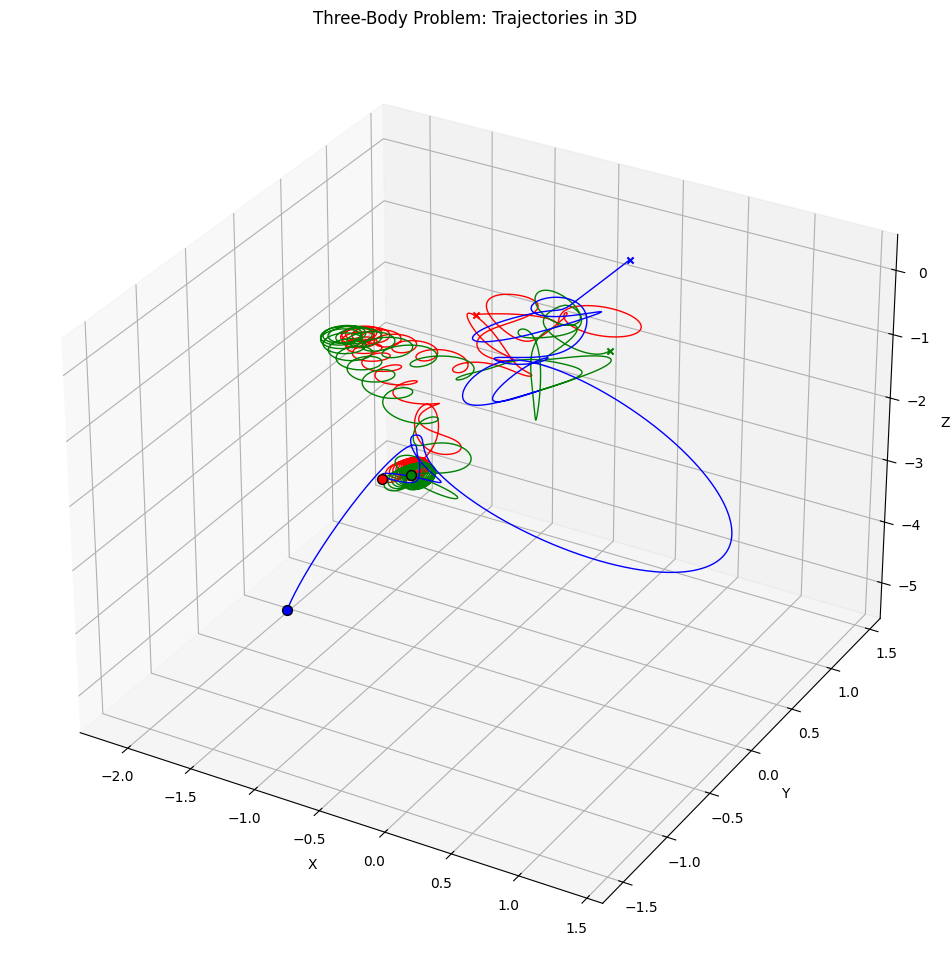

In [41]:
# Create a 3D plot
fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the trajectory of each body
ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], label='Body 1', color='red', linewidth=1)
ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], label='Body 2', color='green', linewidth=1)
ax.plot(r3_sol[:, 0], r3_sol[:, 1], r3_sol[:, 2], label='Body 3', color='blue', linewidth=1)

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a little dot at the end of each trajectory
ax.scatter(r1_sol[-1, 0], r1_sol[-1, 1], r1_sol[-1, 2], color='red', s=50, label='End Body 1', zorder=5, edgecolor='black')
ax.scatter(r2_sol[-1, 0], r2_sol[-1, 1], r2_sol[-1, 2], color='green', s=50, label='End Body 2', zorder=5, edgecolor='black')
ax.scatter(r3_sol[-1, 0], r3_sol[-1, 1], r3_sol[-1, 2], color='blue', s=50, label='End Body 3', zorder=5, edgecolor='black')

# Add a little dot at the end of each trajectory
ax.scatter(r1_sol[0, 0], r1_sol[0, 1], r1_sol[0, 2], color='red', s=20, label='Beggining Body 1', zorder=5, marker='x', edgecolor='black')
ax.scatter(r2_sol[0, 0], r2_sol[0, 1], r2_sol[0, 2], color='green', s=20, label='Beggining Body 2', zorder=5, marker='x', edgecolor='black')
ax.scatter(r3_sol[0, 0], r3_sol[0, 1], r3_sol[0, 2], color='blue', s=20, label='Beggining Body 3', zorder=5, marker='x', edgecolor='black')


# Set the viewing angle (elev = elevation, azim = azimuth)
#ax.view_init(azim=45)  # Adjust these values as needed


# Set title and legend
ax.set_title('Three-Body Problem: Trajectories in 3D')
#ax.legend()

plt.show()

/var/folders/mx/1c1hr6096hd7bz7xt9yf1b340000gn/T/ipykernel_21482/1331985914.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper left",fontsize=14)


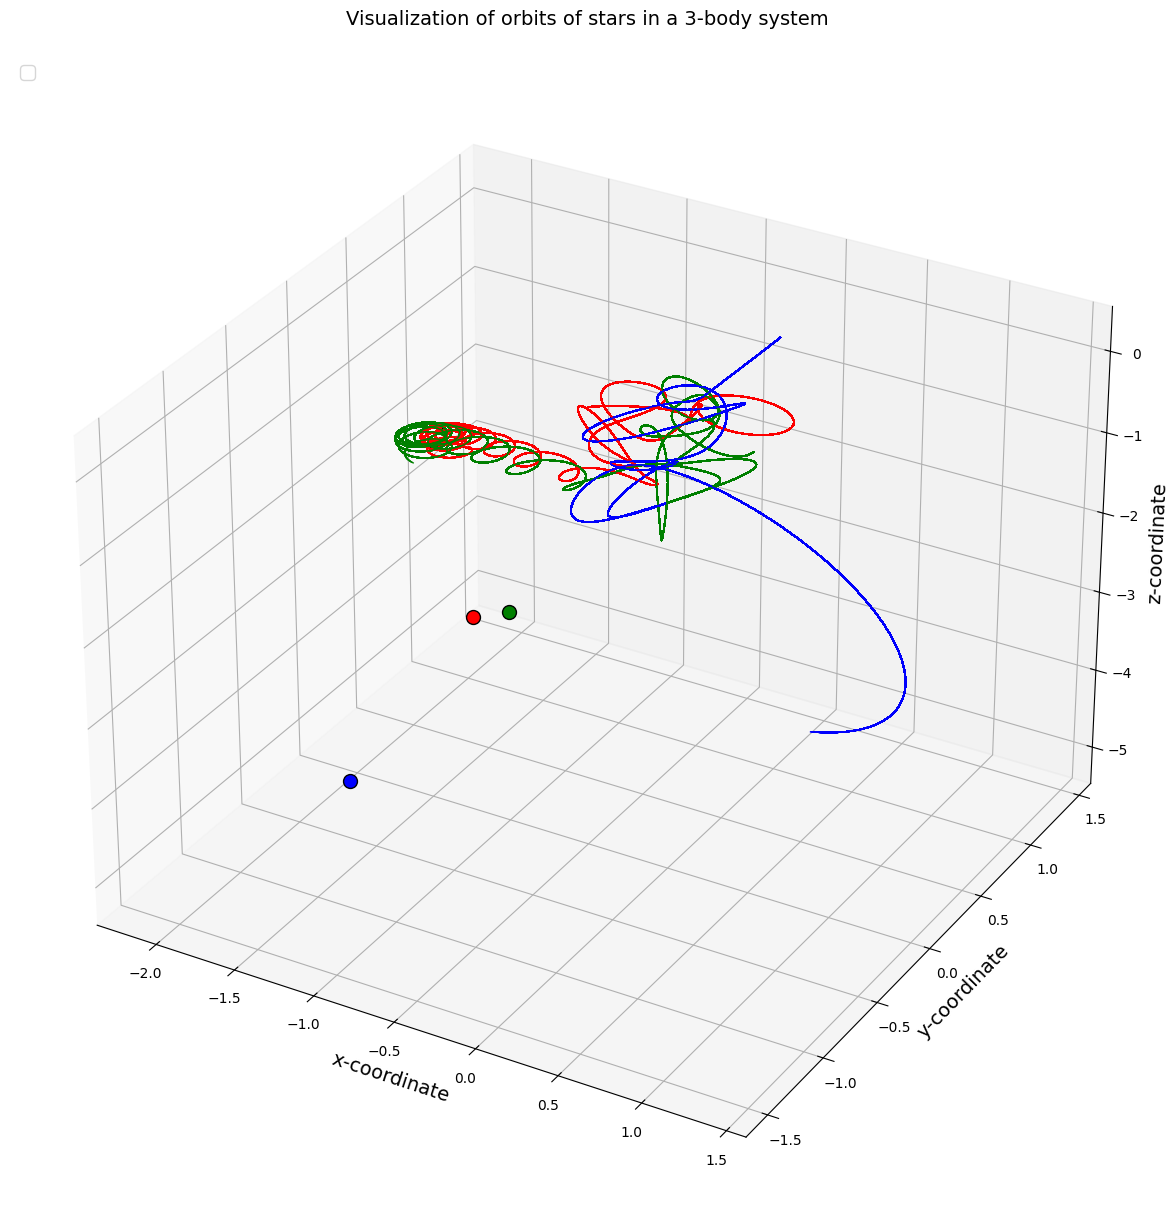

In [54]:
#Animate the orbits of the three bodies


#Make the figure 
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111,projection="3d")

#Create new arrays for animation, this gives you the flexibility
#to reduce the number of points in the animation if it becomes slow
#Currently set to select every 4th point
r1_sol_anim=r1_sol[::1,:].copy()
r2_sol_anim=r2_sol[::1,:].copy()
r3_sol_anim=r3_sol[::1,:].copy()

#Set initial marker for planets, that is, blue,red and green circles at the initial positions
head1=[ax.scatter(r1_sol_anim[0,0],r1_sol_anim[0,1],r1_sol_anim[0,2],color="red",marker="o",s=50)]
head2=[ax.scatter(r2_sol_anim[0,0],r2_sol_anim[0,1],r2_sol_anim[0,2],color="green",marker="o",s=50)]
head3=[ax.scatter(r3_sol_anim[0,0],r3_sol_anim[0,1],r3_sol_anim[0,2],color="blue",marker="o",s=50)]

#Create a function Animate that changes plots every frame (here "i" is the frame number)
def Animate(i,head1,head2,head3):
    #Remove old markers
    head1[0].remove()
    head2[0].remove()
    head3[0].remove()
    
    #Plot the orbits (every iteration we plot from initial position to the current position)
    trace1=ax.plot(r1_sol_anim[:i,0],r1_sol_anim[:i,1],r1_sol_anim[:i,2],color="red", linewidth=1)
    trace2=ax.plot(r2_sol_anim[:i,0],r2_sol_anim[:i,1],r2_sol_anim[:i,2],color="green", linewidth=1)
    trace3=ax.plot(r3_sol_anim[:i,0],r3_sol_anim[:i,1],r3_sol_anim[:i,2],color="blue", linewidth=1)
    
    #Plot the current markers
    head1[0]=ax.scatter(r1_sol_anim[i-1,0],r1_sol_anim[i-1,1],r1_sol_anim[i-1,2],color="red",marker="o",s=100, edgecolor='black')
    head2[0]=ax.scatter(r2_sol_anim[i-1,0],r2_sol_anim[i-1,1],r2_sol_anim[i-1,2],color="green",marker="o",s=100, edgecolor='black')
    head3[0]=ax.scatter(r3_sol_anim[i-1,0],r3_sol_anim[i-1,1],r3_sol_anim[i-1,2],color="blue",marker="o",s=100, edgecolor='black')
    return trace1,trace2,trace3,head1,head2,head3,

#Some beautifying
ax.set_xlabel("x-coordinate",fontsize=14)
ax.set_ylabel("y-coordinate",fontsize=14)
ax.set_zlabel("z-coordinate",fontsize=14)
ax.set_title("Visualization of orbits of stars in a 3-body system\n",fontsize=14)
ax.legend(loc="upper left",fontsize=14)


#If used in Jupyter Notebook, animation will not display only a static image will display with this command
# anim_2b = animation.FuncAnimation(fig,Animate_2b,frames=1000,interval=5,repeat=False,blit=False,fargs=(h1,h2))


#Use the FuncAnimation module to make the animation
repeatanim=animation.FuncAnimation(fig,Animate,frames=800,interval=10,repeat=False,blit=False,fargs=(head1,head2,head3))

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=4000)

#To save animation to disk, enable this command
repeatanim.save("ThreeBodyProblem.mp4", writer=writer)